# 0. Import libraries and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [139]:
data = pd.read_csv("../raw_data/global_crisis_data_country_csv.csv", encoding='unicode_escape')

In [140]:
print(data.shape)
data.head()

(15191, 27)


,Case,CC3,Country,Year,Banking Crisis,Banking_Crisis_Notes,Systemic Crisis,Gold Standard,exch_usd,exch_usd_alt1,...,Domestic_Debt_ Notes/Sources,"SOVEREIGN EXTERNAL DEBT 1: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom and post-1975 defaults on Official External Creditors","SOVEREIGN EXTERNAL DEBT 2: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom but includes post-1975 defaults on Official External Creditors",Defaults_External_Notes,GDP_Weighted_default,<,"Inflation, Annual percentages of average consumer prices",Independence,Currency Crises,Inflation Crises
0,NaN,NaN,NaN,NaN,x,NaN,x,x,NaN,NaN,...,NaN,x,NaN,NaN,x,x,NaN,x,x,x
1,1.0,DZA,Algeria,1800.0,0,NaN,0,0,NaN,NaN,...,NaN,0,0.0,NaN,0,NaN,NaN,0,0,0
2,1.0,DZA,Algeria,1801.0,0,NaN,0,0,NaN,NaN,...,NaN,0,0.0,NaN,0,NaN,NaN,0,0,0
3,1.0,DZA,Algeria,1802.0,0,NaN,0,0,NaN,NaN,...,NaN,0,0.0,NaN,0,NaN,NaN,0,0,0
4,1.0,DZA,Algeria,1803.0,0,NaN,0,0,NaN,NaN,...,NaN,0,0.0,NaN,0,NaN,NaN,0,0,0


In [141]:
data.columns

Index(['Case', 'CC3', 'Country', 'Year', 'Banking Crisis ',
       'Banking_Crisis_Notes', 'Systemic Crisis', 'Gold Standard', 'exch_usd',
       'exch_usd_alt1', 'exch_usd_alt2', 'exch_usd_alt3', 'conversion_notes',
       'national currency', 'exch_primary source code', 'exch_sources',
       'Domestic_Debt_In_Default', 'Domestic_Debt_ Notes/Sources',
       'SOVEREIGN EXTERNAL DEBT 1: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom and post-1975 defaults on Official External Creditors',
       'SOVEREIGN EXTERNAL DEBT 2: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom but includes post-1975 defaults on Official External Creditors',
       'Defaults_External_Notes', 'GDP_Weighted_default', '<',
       'Inflation, Annual percentages of average consumer prices',
       'Independence', 'Currency Crises', 'Inflation Crises'],
      dtype='object')

In [142]:
data.rename(columns={'Banking Crisis ':'banking_crisis',
                    'Systemic Crisis':'systemic_crisis',
                    'Banking_Crisis_Notes':'notes',
                    'Gold Standard':'gold_standard',
                    'SOVEREIGN EXTERNAL DEBT 1: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom and post-1975 defaults on Official External Creditors': 'sovereign_external_debt_1',
                    'SOVEREIGN EXTERNAL DEBT 2: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom but includes post-1975 defaults on Official External Creditors': 'sovereign_external_debt_2',
                    'Inflation, Annual percentages of average consumer prices':'annual_inflation'},
            inplace = True)

In [143]:
data.drop(0, inplace = True)
data.shape

(15190, 27)

# 1. Description of the "Global Crises Data by Country" dataset

## 1.1 Get the number of crisis per country

In [280]:
nb_countries = data["Country"].nunique()
min_year = int(data["Year"].min())
max_year = int(data["Year"].max())
nb_observations = max_year - min_year +1
print(f"There are data of {nb_countries} countries in the dataset from {min_year} to {max_year}.")

There are data of 70 countries in the dataset from 1800 to 2016.


In [226]:
data['banking_crisis'] = pd.to_numeric(data['banking_crisis'], errors='coerce')
data['systemic_crisis'] = pd.to_numeric(data['systemic_crisis'], errors='coerce')
data['annual_inflation'] = pd.to_numeric(data['annual_inflation'], errors='coerce')

In [215]:
banking_crisis_per_country = data.groupby('Country')['banking_crisis'].sum().astype(int)
systemic_crisis_per_country = data.groupby('Country')['systemic_crisis'].sum().astype(int)
countries = data['CC3'].unique()

In [210]:
results = pd.DataFrame({
                     'banking_crisis_number': banking_crisis_per_country,
                     'systemic_crisis_number': systemic_crisis_per_country})
results.sort_values(by='banking_crisis_number', ascending=False, inplace = True)

<BarContainer object of 70 artists>

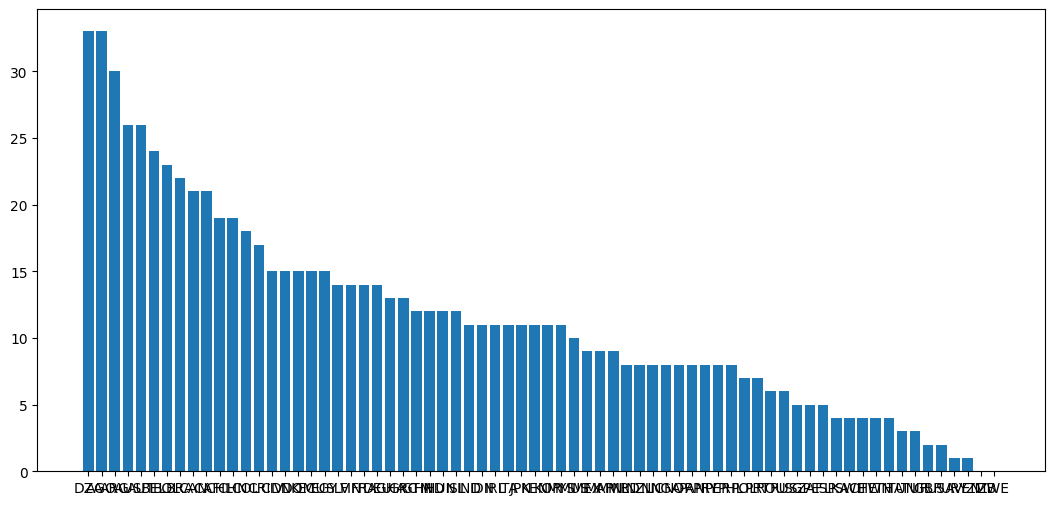

In [220]:
plt.figure(figsize=(13,6))
plt.bar(countries, results['banking_crisis_number'])

In [221]:
print(results.tail())
print(results.head())

             banking_crisis_number  systemic_crisis_number
Country                                                   
Panama                           2                       2
Singapore                        1                       0
Mauritius                        1                       0
Switzerland                      0                       5
Ireland                          0                      10
                banking_crisis_number  systemic_crisis_number
Country                                                      
United States                      33                      20
United Kingdom                     33                      20
Spain                              30                      13
France                             26                      15
Italy                              26                       7


## 1.2 Get the number of negative liquidity shock per country

### 1.2.1 Number of episode of deflation crisis

In [229]:
data['crisis_and_deflation'] = ((data['banking_crisis'] == 1) | (data['systemic_crisis'] == 1)) & (data['annual_inflation'] < 0)
deflations_crisis = data.groupby('Country')['crisis_and_deflation'].sum().astype(int)
deflations_crisis.sort_values(ascending = False)

Country
United States     14
United Kingdom    12
Japan             11
France            10
Sweden            10
                  ..
Morocco            0
Myanmar            0
New Zealand        0
Nicaragua          0
Korea              0
Name: crisis_and_deflation, Length: 70, dtype: int64

### 1.2.3 Frequency of a negative demand shock from every year of the dataset

In [281]:
frequency = (deflations_crisis / nb_observations).round(2)
deflation = pd.DataFrame({'deflation episode' : deflations_crisis,
                          'frequency_deflation' : frequency})
deflation.sort_values(by ='deflation episode', ascending=False, inplace=True)

In [262]:
deflation['deflation episode'].mean()

2.342857142857143

In [266]:
countries_a = deflation.index[deflation['deflation episode']==1].tolist()
countries_a

['Zimbabwe',
 'Finland',
 "CoteD'Ivoire",
 'Uruguay',
 'Philippines',
 'Chile',
 'Egypt']

In [267]:
countries_b = deflation.index[deflation['deflation episode']==3].tolist()
countries_b

['Italy', 'Poland', 'Russia', 'Austria', 'Argentina', 'Hungary']

In [276]:
countries_c = deflation.head().index.tolist()
countries_c

['United States', 'United Kingdom', 'Japan', 'France', 'Sweden']

# 2. Look for specific negative demand shock episode

### 2.1 Focus on the US 

In [282]:
USA_data = data[data["CC3"]=='USA']
USA_data

,Case,CC3,Country,Year,banking_crisis,notes,systemic_crisis,gold_standard,exch_usd,exch_usd_alt1,...,sovereign_external_debt_1,sovereign_external_debt_2,Defaults_External_Notes,GDP_Weighted_default,<,annual_inflation,Independence,Currency Crises,Inflation Crises,crisis_and_deflation
14106,66.0,USA,United States,1800.0,0.0,NaN,0.0,0,4.462293619,NaN,...,0,0.0,NaN,0,1,2.0,1,0,0,False
14107,66.0,USA,United States,1801.0,0.0,NaN,0.0,0,4.363001745,NaN,...,0,0.0,NaN,0,0,1.3,1,0,0,False
14108,66.0,USA,United States,1802.0,0.0,NaN,0.0,0,4.474272931,NaN,...,0,0.0,NaN,0,0,-15.7,1,0,0,False
14109,66.0,USA,United States,1803.0,0.0,NaN,0.0,0,4.662004662,NaN,...,0,0.0,NaN,0,0,5.4,1,0,0,False
14110,66.0,USA,United States,1804.0,0.0,NaN,0.0,0,4.528985507,NaN,...,0,0.0,NaN,0,0,4.4,1,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14318,66.0,USA,United States,2012.0,0.0,NaN,0.0,0,1.6251,NaN,...,0,0.0,NaN,0,0,2.1,1,0,0,False
14319,66.0,USA,United States,2013.0,0.0,NaN,0.0,0,1.6556,NaN,...,0,0.0,NaN,0,0,1.5,1,0,0,False
14320,66.0,USA,United States,2014.0,0.0,NaN,0.0,0,1.5573,NaN,...,0,0.0,NaN,0,0,1.6,1,0,0,False
14321,66.0,USA,United States,2015.0,NaN,NaN,0.0,0,1.4738,NaN,...,0,0.0,NaN,0,0,0.1,1,0,NaN,False
